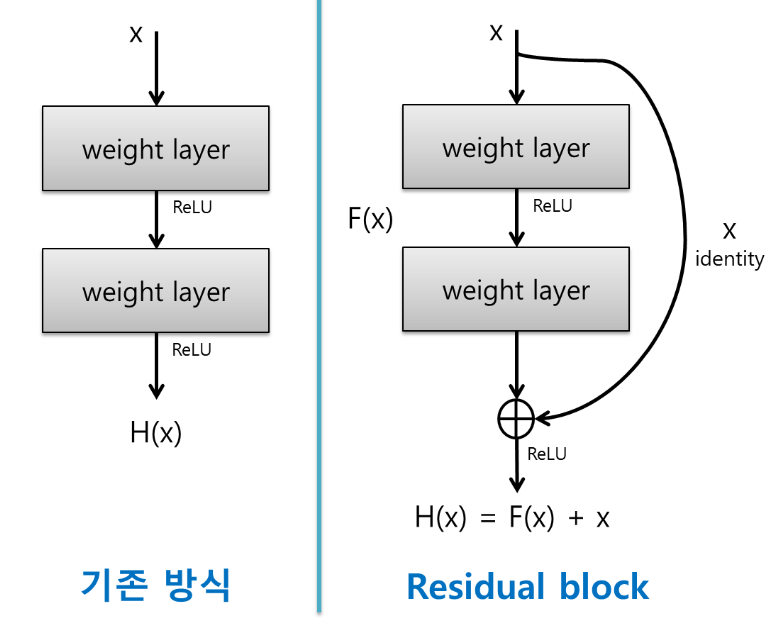

# Resnet나혼자 정리!
왼쪽은 "Plane" layer를 설명하는 그림이고, 오른쪽은 Residual Block을 설명하는 그림이다.
두 구조의 차이점은 한 가지이다. 동일한 연산을 하고 나서 Input인 x를 더하는 것(Residual Block)과 더하지 않는 것(Plane layer)의 차이이다.
단순하게 Input x를 더하는 것만으로 layer는 Direct로 학습하는 것 대신에, Skip Connection을 통해 각각의 layer(Block)들이 작은 정보만을 추가적으로 학습하도록 한다. (= 각각의 layer가 배워야 할 정보량을 축소) 
***즉 기존에 학습된 x를 추가함으로써 x만큼을 제외한 나머지 부분(F(X))만을 학습하면 되므로 학습량이 상대적으로 줄어드는 효과가 있다.***

<plain layer의 경우>

레이어의 아웃풋인 Feature vector(Feature Map)을 y라고 할 때 y=f(x)가 Direct로 학습하는 위의 왼쪽 그림을 설명하는 수식이라고 할 수 있다.
여기에서 아웃풋인 y는 x를 통해 새롭게 학습하는 정보이다. 즉, 기존에 학습한 정보를 보존하지 않고 변형시켜 새롭게 생성하는 정보이다.
이 경우에 Neural Network가 고차원적인 Feature vector로의 Mapping을 학습한다는 개념으로 생각했을 때, 층이 깊어질수록 한번에 학습해야 할 Mapping이 너무 많아져 학습이 어려워 진다.

- 한꺼번에 첨부터끝까지 공부하고 y고쳐야함

<Residual Block의 경우>

반대로 오른쪽 그림을 설명하는 수식은 y=f(x)+x이다.
여기에서의 y는 x가 그대로 보존되므로 ⭐'기존에 학습한 정보를 보존하고'⭐, 거기에 추가적으로 학습하는 정보를 의미하게 된다. 즉, Output에 이전 레이어에서 학습했던 정보(x)를 연결함으로써 해당 층에서는 추가적으로 학습해야 할 정보만을 Mapping, 학습하게 된다.

- 짤막짤막 공부하는느낌. 1단계 공부하고 학습했어 x
- x공부한거 그대로더하고+ 2단계학습만고치기

좀 더 이해를 돕기 위해 예를 들면 다음의 두 가지 경우에 대해서,
(1) open book이 불가능한 시험
(2) open book이 가능한 시험
(1)의 경우에는 시험의 범위가 많아질수록(= 층이 깊어지고 한번에 학습할 Mapping이 많은 경우) 공부하기가 어려울수가 있으나,
반면에 (2)의 경우에는 이미 배웠던 내용(x)가 제공되기 때문에 추가적으로 학습해야 할 정보만을 공부할 것이다.

그리고 학습이 진행되어 layer의 depth가 깊어질 수록, 즉 학습이 많이 될수록 x는 점점 출력값 H(x)에 근접하게 되어 추가 학습량 F(x)는 점점 작아져서 최종적으로 0에 근접하는 최소값으로 수렴되어야 할 것이다.
다시 말해, H(x)=F(x)+x에서 추가 학습량에 해당하는 F(x)=H(x)−x가 최소값(0)이 되도록 학습이 진행이 된다.
그리고,
H(x)=F(x)+x 이므로 네트워크 구조 또한 크게 변경할 필요가 없는데, 단순히 입력에서 출력으로 바로 연결되는 shortcut만 추가하면 되기 때문이다. 또한, 입력과 같은 x가 그대로 출력에 연결되기에 파라미터 수에 영향이 없으며, 덧셈이 늘어나는 것을 제외하면 shortcut 연결을 통한 연산량 증가는 없다.
여기서 H(x) - x를 잔차(residual) 라고 한다. 즉, 잔차를 최소로 해주는 것이므로 ResNet이란 이름이 붙게 된다.
이 외에도 ResNet에는 Skip-Connection(또는 Shortcut-Connection), identity mapping, Pre-Activation등의 특징들이 있는데 바로 이어서 다루도록 한다.

# ResNet의 구조
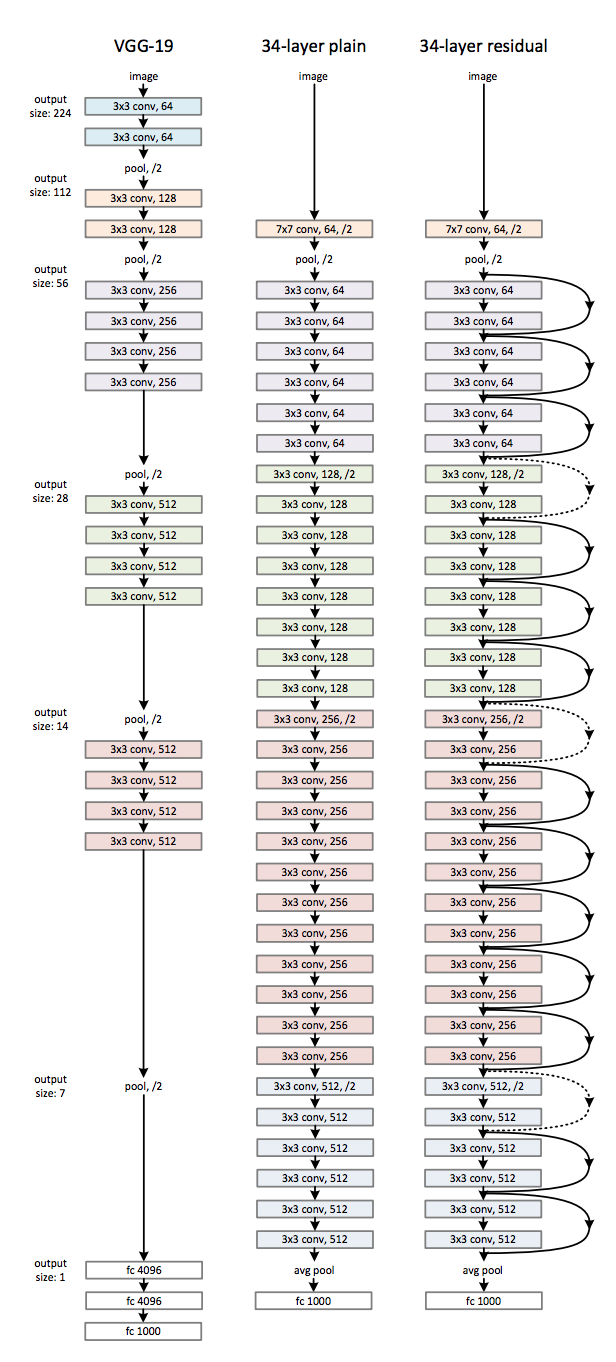

맨오른쪽그림이 resnet

실선 : feature의 크기변화가 없음

점선 : feature의 크기가 변화(채널의 개수가 바뀔때 줄어든다)

- shortcut들이 연결되어있다 = skip connetion 
- identity들이 연결되어있다.

1개 stage, 3개 block

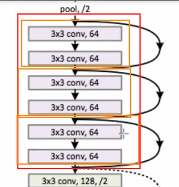

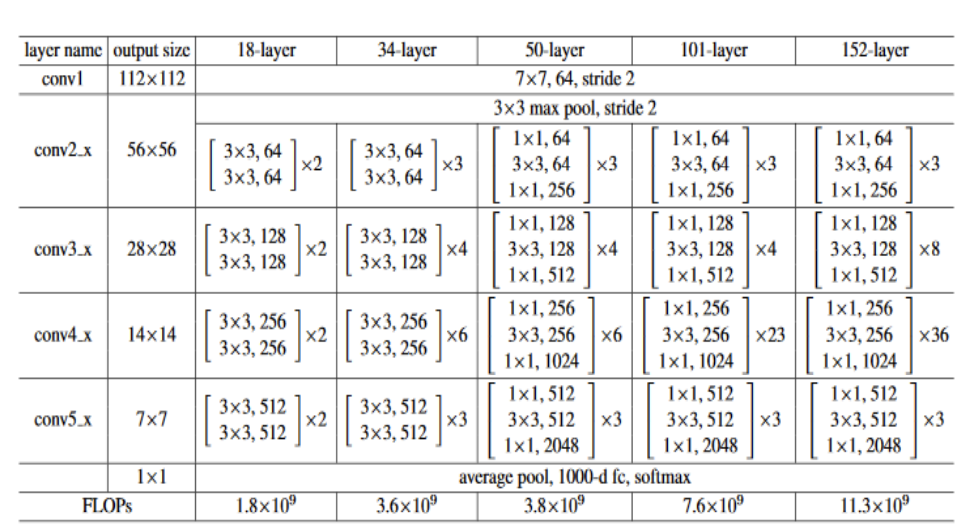

# 5개의 Stage
- 1번의 stage는 여러개의 동일한 block으로 구성

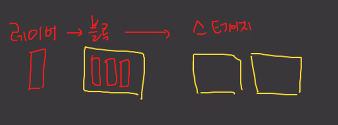

X3 X4같은건 블록개수
- 18~ 152층까지 엄청 깊게 쌓을 수 있음!

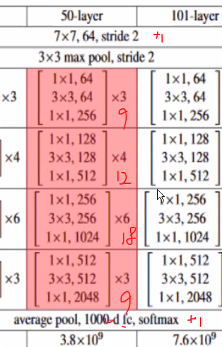

1X1 bottlenect사용하는 50층짜리 만들거

# identity block부터 만들자

* `input_x` : block 마다 존재하는 conv에 들어갈 tensor
* `middle_kernel_size` : 커널의 크기. 위 아래 들어가는 커널은 1x1로 고정. 가운데 있는 커널은 3x3 또는 5x5로 언제든 변동 될 수 있도록 할 예정
* `filters` : (1x1), (3x3), (1x1) conv에 들어가는 필터의 각각의 개수
  - 첫 번째 1x1에서는 채널의 숫자를 1/4( 또는 1/2)로 축소
    - bottle Neck연산이 일어남
  - 두 번째 3x3에서는 채널의 숫자를 유지
  - 세 번째 1x1에서는 채널의 숫자를 원래대로 복구
* `stage` : identity block들이 여러 개 결합 됐을 때 이를 구분하기 위한 용도. 동일한 필터 수, 동일한 채널을 가지는 identity block 들을 하나의 stage로 설정

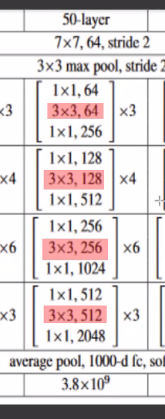

middel_kernel_size는 커스터마이징 가능

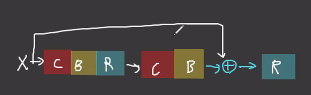

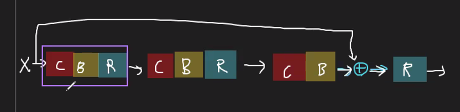


50층짜리 만들거

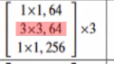

In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation
from tensorflow.keras.layers import Add # Mapping을 위한 Add레이어

In [ ]:
def identity_block(input_x, middle_kernel_size, filters, stage_name, block_name): # filers 튜플이나 리스트로 넘길거
  filter1, filter2, filter3 = filters # 언패킹
  # filter1 : 1X1 필터개수
  # filter2 : middel_kernel_size X middel_kernel_size 필터개수
  # filter3 : 1X1 필터개수

  # conv, bn 각각의 레이어에 대한 고유한 이름을 부여해줄거
  # res_2_1_branch -> 2번 스테이지에 1번째 Resudual 
  # bn_2_1_branch -> 2번 스테이지에 1번재 BN

  conv_name_base = 'res_{}_{}_branch_'.format(stage_name, block_name)
  bn_name_base = 'bn_{}_{}_branch_'.format(stage_name, block_name)
  
  # 첫번째 연산
  x = Conv2D(filters=filter1, kernel_size=1, kernel_initializer='he_normal', name=conv_name_base+"a" )(input_x)
  x = BatchNormalization(name=bn_name_base+"a")(x)
  x = Activation('relu')(x)

  # 두번째 연산
  x = Conv2D(filters=filter2, kernel_size=middle_kernel_size, padding = 'same', kernel_initializer='he_normal', name=conv_name_base+"b")(x)
  x = BatchNormalization(name=bn_name_base+"b")(x)
  x = Activation('relu')(x)

  # 세번째 연산
  x = Conv2D(filters=filter3, kernel_size=1, kernel_initializer='he_normal', name=conv_name_base+"c")(x)
  fx = BatchNormalization(name=bn_name_base+"c")(x)

  # ----------여기까지 결과값이 F(x)
  # identity mapping수행⭐
  x = Add()([input_x, fx]) # input_x와 fx더해주기

  hx = Activation('relu')(x)

  return hx

# H(x)= F(x) + x

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

input = Input(shape=(56,56,256), name='input_x')

output = identity_block(input, 3, (64,64,256), 2, 1)

identity_layer = Model(inputs = input, outputs = output)
identity_layer.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_x (InputLayer)           [(None, 56, 56, 256  0           []                               
                                )]                                                                
                                                                                                  
 res_2_1_branch_a (Conv2D)      (None, 56, 56, 64)   16448       ['input_x[0][0]']                
                                                                                                  
 bn_2_1_branch_a (BatchNormaliz  (None, 56, 56, 64)  256         ['res_2_1_branch_a[0][0]']       
 ation)                                                                                           
                                                                                              

# stage가 바뀔땐 input feature map의 크기를 반띵해줘야!!
- shortcut전달시 1X1 stride를 2로적용

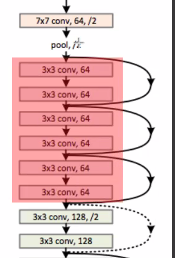

- 단 첫번째 stage는 이미 pooling때매 반띵으로 들어오기때문에 처리안해줘도됨

In [ ]:
def conv_block(input_x, middle_kernel_size, filters, stage_name, block_name, strides=2):
  filter1, filter2, filter3 = filters

  conv_name_base = 'res_{}_{}_branch_'.format(stage_name, block_name)
  bn_name_base = 'bn_{}_{}_branch_'.format(stage_name, block_name)

  # 첫번째 연산
  # 첫뻔재 Conv에서 strides를 이용해 input feature map을 1/2로 줄여준다.⭐ bottle neck하면서
  x = Conv2D(filters=filter1, kernel_size=1, strides=strides, kernel_initializer='he_normal', name=conv_name_base+"a" )(input_x)
  x = BatchNormalization(name=bn_name_base+"a")(x)
  x = Activation('relu')(x) 
  
  # 두번째 연산
  x = Conv2D(filters=filter2, kernel_size=middle_kernel_size, padding='same', kernel_initializer='he_normal', name=conv_name_base+"b")(x)
  x = BatchNormalization(name=bn_name_base+"b")(x)
  x = Activation('relu')(x) 

  # 세번째 연산
  x = Conv2D(filters=filter3, kernel_size=1, kernel_initializer='he_normal', name=conv_name_base+"c")(x)
  fx = BatchNormalization(name=bn_name_base+"c")(x)

  # x크기를 fx크기와 맞춰주고(아까 첫번째 레이어연산에서 F(x)크기가 반띵나서)
  shortcut = Conv2D(filters=filter3, kernel_size=1, strides=strides, kernel_initializer='he_normal', name=conv_name_base+"shortcut")(input_x)
  shortcut = BatchNormalization(name=bn_name_base+'shortcut')(shortcut)

  # 이제 identity mapping수행⭐
  hx = Add()([fx, shortcut])

  hx = Activation('relu')(hx)

  return hx



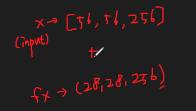

지금 fx가 반띵나서 더하기안됨.
x를 (28,28,256)으로 바꿔줄꺼

# conv_block이랑 identity_block으로 stage를 구성해보자

In [ ]:
input = Input(shape=(56,56,256), name='input_x')

x = conv_block(input, 3, (64,64,256), stage_name=2, block_name=1, strides=2) # 처음에 반띵
x = identity_block(x, 3, (64,64,256), stage_name=2, block_name=2)
output = identity_block(x, 3, (64,64,256), stage_name=2, block_name=3)


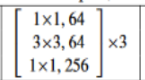

이거만든거

In [ ]:
identity_layer = Model(inputs=input, outputs=output)
identity_layer.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_x (InputLayer)           [(None, 56, 56, 256  0           []                               
                                )]                                                                
                                                                                                  
 res_2_1_branch_a (Conv2D)      (None, 28, 28, 64)   16448       ['input_x[0][0]']                
                                                                                                  
 bn_2_1_branch_a (BatchNormaliz  (None, 28, 28, 64)  256         ['res_2_1_branch_a[0][0]']       
 ation)                                                                                           
                                                                                            

# Residual Block을 사용하기 위한 전 작업

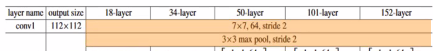


In [ ]:
from tensorflow.keras.layers import MaxPooling2D

input = Input(shape=(224,224,3))

x = Conv2D(filters=64, kernel_size=7, strides=2, kernel_initializer='he_normal')(input)
# 패딩안주면 x = (109,109,64)가나옴. 패딩넣으면 (112,112,64)나오지만 패딩안주고 하는법 해보자

x = MaxPooling2D(pool_size=3, strides=2)

# output feature map크기 계산 공식

O = ((I - F + 2P) / s ) + 1
- O : 아웃풋피쳐맵의 H또는 W
- I : 입력되는 H또는 W
- F : 커널의크기
- P : 패딩
- S : 스트라이드

In [ ]:
# 패딩없이계산한경우
((224 - 7 + (2*0)) / 2) + 1

109.5

In [ ]:
# 패딩을 위아래양옆에 3개씩 배치하면 230X230이 될거
((230 - 7 + (2*0)) / 2) + 1

112.5

In [ ]:
from tensorflow.keras.layers import ZeroPadding2D

input = Input(shape=(224,224,3))

# 입력데이터에 대해서 패딩을 개발자가 마음대로 부여하기
x = ZeroPadding2D(padding=(3,3))(input)
x = Conv2D(filters=64, kernel_size=7, strides=2, padding='valid', kernel_initializer="he_normal")(x)

# x.shape = (112, 112, 64)

x = BatchNormalization()(x)
x = Activation('relu')(x)

x = ZeroPadding2D(padding=(1,1))(x)
x = MaxPooling2D(pool_size=3, strides=2)(x)

x.shape

# 위의표 56X56 완성!

TensorShape([None, 56, 56, 64])

# ResNet50 완성하기

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

input = Input(shape=(224,224,3))

# 입력데이터 처리(표에서 맨윗부분)
x = ZeroPadding2D(padding=(3,3))(input)
x = Conv2D(filters=64, kernel_size=7, strides=2, padding='valid', kernel_initializer="he_normal")(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = ZeroPadding2D(padding=(1,1))(x)
x = MaxPooling2D(pool_size=3, strides=2)(x)

# feature Extraction
x = conv_block(x, 3, (64,64,256), stage_name=2, block_name=1, strides=1) # max pooling 2D 덕에 56,56짜리 됐으니까
x = identity_block(x, 3, (64,64,256), stage_name=2, block_name=2)
x = identity_block(x, 3, (64,64,256), stage_name=2, block_name=3)

x = conv_block(x, 3, (128,128,512), stage_name=3, block_name=1, strides=2)
x = identity_block(x, 3, (128,128,512), stage_name=3, block_name=2)
x = identity_block(x, 3, (128,128,512), stage_name=3, block_name=3)
x = identity_block(x, 3, (128,128,512), stage_name=3, block_name=4)
# 28,28,512

x = conv_block(x, 3, (256,256,1024), stage_name=4, block_name=1, strides=2)
x = identity_block(x, 3, (256,256,1024), stage_name=4, block_name=2)
x = identity_block(x, 3, (256,256,1024), stage_name=4, block_name=3)
x = identity_block(x, 3, (256,256,1024), stage_name=4, block_name=4)
x = identity_block(x, 3, (256,256,1024), stage_name=4, block_name=5)
x = identity_block(x, 3, (256,256,1024), stage_name=4, block_name=6)
# 14,14,1024

x = conv_block(x, 3, (512,512,2048), stage_name=5, block_name=1, strides=2)
x = identity_block(x, 3, (512,512,2048), stage_name=5, block_name=2)
x = identity_block(x, 3, (512,512,2048), stage_name=5, block_name=3)
# 7,7,2048
# 512 개이상이므로 GlobalAveragePooling2D
x = GlobalAveragePooling2D()(x)


# Fully Connected layer
output  = Dense(1000, activation='softmax')(x)

model = Model(inputs=input, outputs=output)

model.summary()





Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_18 (ZeroPadding  (None, 230, 230, 3)  0          ['input_14[0][0]']               
 2D)                                                                                              
                                                                                                  
 conv2d_11 (Conv2D)             (None, 112, 112, 64  9472        ['zero_padding2d_18[0][0]']      
                                )                                                           

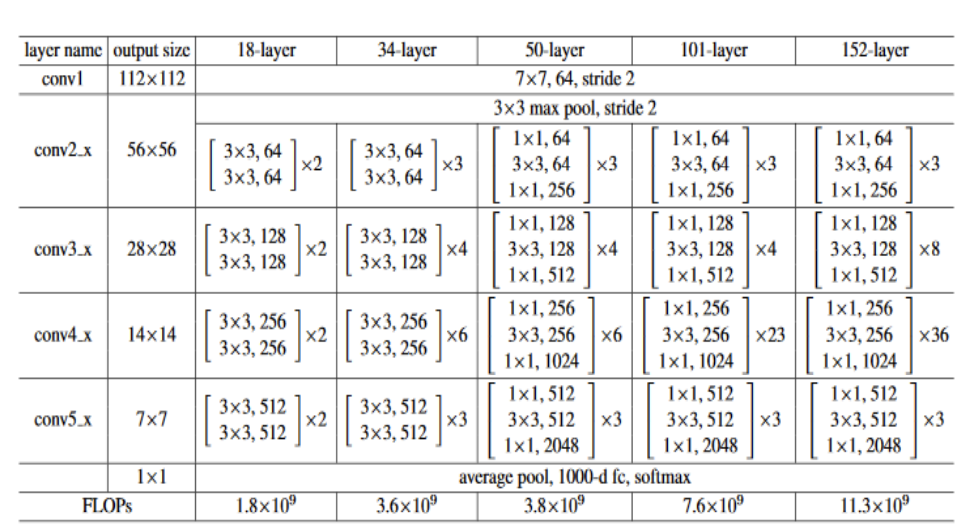